In [7]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

20220915_105506.csv is the one with 10M row group, zxy cluster, and skipping

scale: linear


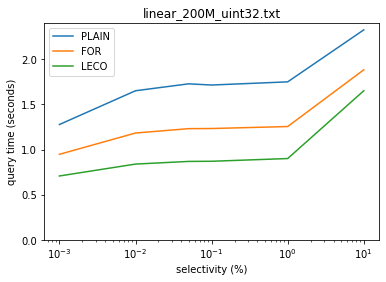

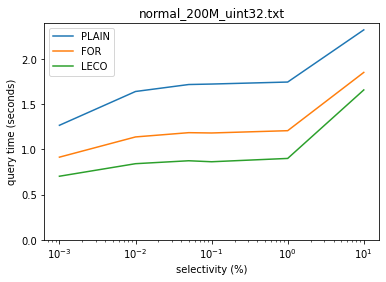

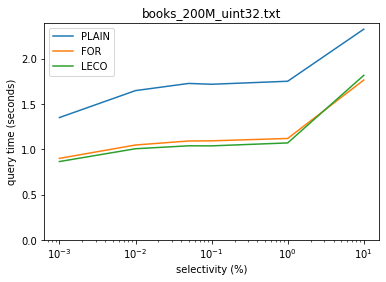

In [32]:
from curses.panel import bottom_panel

PROJ_SRC_DIR = '/root/arrow-private/cpp'
# name='20220904_143952.csv'
# name = f'{PROJ_SRC_DIR}/output/20220905_140614.csv'
# name = f'{PROJ_SRC_DIR}/output/20220913_193623.csv'
# name = f'{PROJ_SRC_DIR}/output/20220914_145832_1M.csv'
name = f'{PROJ_SRC_DIR}/output/20220915_174427.csv'
df = pd.read_csv(name) 
# print(df)
df_avg = df.groupby(['dataset', 'encoding','selectivity'], as_index=False).mean().set_index(['dataset','encoding'])
# print(df_avg)
# print(df_avg.loc['books_200M_uint32.txt', 'DICT'])
dataset_dict = set()
encoding_dict = set()
for i, row in df_avg.iterrows():   
    dataset_dict.add(i[0])
    encoding_dict.add(i[1])

scale = ['linear']
for s in scale:
    print(f'scale: {s}')
    for ds in dataset_dict:
        for enc in encoding_dict:
            # print(ds, enc)
            # print(df_avg.loc[ds, enc])
            plt.plot(df_avg.loc[ds, enc]['selectivity'], df_avg.loc[ds, enc]['query_time'], label=enc)
        plt.yscale(s)
        plt.xscale('log')
        plt.ylim(bottom=0)
        plt.legend()
        plt.xlabel('selectivity (%)')
        plt.ylabel('query time (seconds)')
        plt.title(ds)
        # plt.savefig(f'{ds}_{s}.png')
        plt.show()
# df_avg.loc['books_200M_uint32.txt', 'DICT'].plot(x='selectivity', y='query_time', label='DICT')
# df_avg.plot()
# plt.show()

In [13]:
import scipy.stats
dist = scipy.stats.binom(1, 0.5)

In [14]:
import numpy as np
NUM_KEYS = 100
prob_ = 0.4
keys1 = np.random.choice([0, 1], size=NUM_KEYS//2, p=[1.0-prob_*0.1, prob_*0.1])
keys2 = np.random.choice([0, 1], size=NUM_KEYS//2, p=[1.0-prob_*1.9, prob_*1.9])
print(np.concatenate((keys1, keys2)))
# print(type(keys1))
# print(np.concatenate(np.array(keys1).astype(np.uint32), np.array(keys2).astype(np.uint32)))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1]


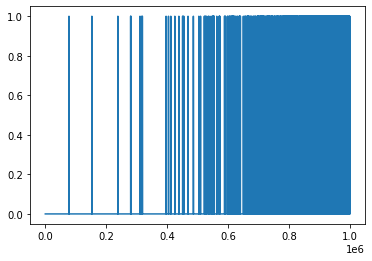

In [3]:
# file = open('/root/arrow-private/cpp/Learn-to-Compress/data/bitmap_lyh/bitmap_random_1e-05_200000000.txt', 'r')
file = open('/root/arrow-private/cpp/Learn-to-Compress/data/bitmap_random_cluster/bitmap_random_0.01_1000000.txt', 'r')
lines = file.readlines()
file.close()
bitmap = []
for line in lines:
    bitmap.append(int(line))
import matplotlib.pyplot as plt
plt.plot(bitmap)

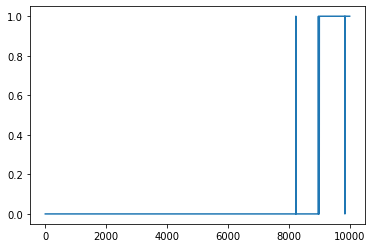

In [16]:
plt.plot(bitmap[0:20000000])